## Importing libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


## Loading Dataset

In [90]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [68]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


### Finding Missing values

In [70]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

### Total Products

In [71]:
print("Total products: ", df['itemDescription'].nunique())


Total products:  167


## Top 10 frequently sold products

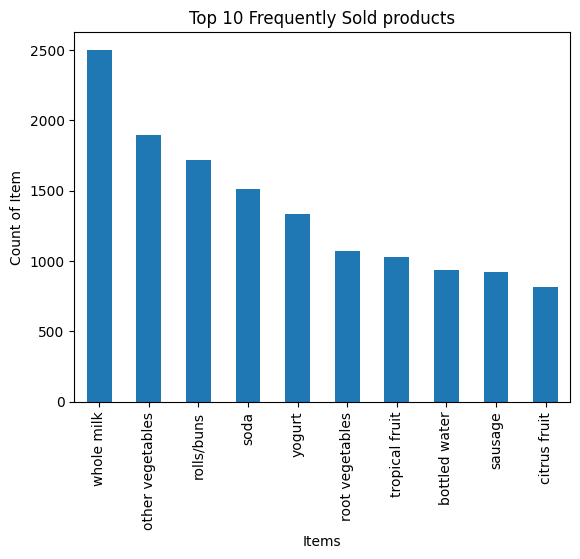

In [72]:
df['itemDescription'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Count of Item')
plt.title('Top 10 Frequently Sold products')
plt.show()

In [73]:
all_products = df['itemDescription'].unique()

### One-hot representation of products purchased

In [74]:
one_hot1 = pd.get_dummies(df['itemDescription'])
df = df.drop(['itemDescription'], axis=1)
df = df.join(one_hot1)
df.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-01-05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-02-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Transactions
Note: if a customer bought multiple products on same day, We will consider it one transaction 

In [75]:

transactions1 = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum)
transactions1 = transactions1.reset_index()[all_products]


In [76]:
transactions1

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
def hot_encode(x):
    if(x<= 0):
        return False
    if(x>= 1):
        return True

transactions2 = transactions1.applymap(hot_encode)


## Frequent Itemset Generation

In [78]:
# Building the model
frequent_items = apriori(transactions2, min_support = 0.005, use_colnames = True)


In [79]:
frequent_items

,support,itemsets
0,0.067767,(tropical fruit)
1,0.157923,(whole milk)
2,0.049054,(pip fruit)
3,0.122101,(other vegetables)
4,0.110005,(rolls/buns)
...,...,...
121,0.008087,"(soda, rolls/buns)"
122,0.005748,"(sausage, yogurt)"
123,0.005814,"(yogurt, soda)"
124,0.005948,"(sausage, soda)"


We got 126 Frequent Itemset based on 0.005 minimum support.

## Rules Generation

In [84]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frequent_items, metric ="lift", min_threshold = 0.5)

# Sorting values according to Confidence and Lift
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])


In [85]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
24,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
36,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
40,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
18,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958


In [86]:
print('Total Rules: ', len(rules))

Total Rules:  74
